#Online sales business by month


Diberikan sebuah data hasil penjualan berdasarkan tipe produk. Net Quantity menyatakan banyaknya barang yang terjual, jika nilainya negatif artinya terdapat barang yang rusak dan mendapatkan kerugian seharga dengan harga jual barang. Gross Sales menyatakan total harga jual yang diperoleh dari harga satuan barang dikali dengan Net Quantity pada jenis barang tertentu. Discounts menyatakan total potongan harga dari suatu jenis barang. Returns menyatakan pengembalian dana yang dilakukan penjual kepada pembeli dikarenakan beberapa alasan pengembalian barang. Total Net Sales merupakan total harga jual akhir, atau total pendapatan dari suatu jenis barang.

#Defining Questions

1. What would be the trend of Revenue vs Nett Sales month over month and year over year? on which month we have the highest or lowest sales? why? (Data by Month)
2. What's the growth rate of sales? (Data by Month)
3. What product line contributes the most to the sales?
4. The discounted items - has it been effective to the sales increase?
5. Which product has the highest return? what can we do to improve? 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_excel("/content/Case study A - online sales business (2) by month.xlsx")
print("Shape dataset : ", df.shape)
print('\nLima data teratas')
df.head()
print('\nInformasi dataset')
df.info()
print('\nStatistik deskriptif')
df.describe()

Shape dataset :  (36, 9)

Lima data teratas

Informasi dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         36 non-null     object 
 1   Year          36 non-null     int64  
 2   Total Orders  36 non-null     int64  
 3   Gross Sales   36 non-null     float64
 4   Discounts     36 non-null     float64
 5   Returns       36 non-null     float64
 6   Net Sales     36 non-null     float64
 7   Shipping      36 non-null     float64
 8   Total Sales   36 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.7+ KB

Statistik deskriptif


,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,97.138889,9844.926389,-311.493889,-474.958056,9058.474444,1579.391667,10637.941111
std,0.828079,57.458632,4936.386351,362.766989,488.820410,4497.185264,1011.170014,5475.621125
min,2017.000000,54.000000,5720.000000,-2269.510000,-1572.550000,4589.100000,695.420000,5296.530000
25%,2017.000000,68.000000,7059.875000,-300.375000,-867.200000,6428.250000,1083.300000,7633.692500
50%,2018.000000,82.500000,8850.500000,-236.160000,-299.875000,8076.430000,1341.650000,9404.405000
75%,2019.000000,97.500000,10150.700000,-169.487500,-73.277500,9534.000000,1632.132500,11153.687500
max,2019.000000,342.000000,31183.900000,-51.500000,0.000000,27603.210000,5703.250000,33306.460000


In [71]:
#Missing value
df.isnull().sum()

Month           0
Year            0
Total Orders    0
Gross Sales     0
Discounts       0
Returns         0
Net Sales       0
Shipping        0
Total Sales     0
dtype: int64

In [72]:
#Sum of Total Orders per year
Month = pd.DataFrame(df.Month.unique().tolist(), columns=["Month"])
Total_Orders = df["Total Orders"]
TO17 = pd.DataFrame(Total_Orders[:12].tolist(), columns=["2017"])
TO18 = pd.DataFrame(Total_Orders[12:24].tolist(), columns=["2018"])
TO19 = pd.DataFrame(Total_Orders[24:].tolist(), columns=["2019"])
Month["2017"], Month["2018"], Month["2019"] = TO17, TO18, TO19
print("Total Orders")
Month

Total Orders


,Month,2017,2018,2019
0,January,73,83,87
1,February,56,69,63
2,March,60,64,99
3,April,70,81,92
4,May,54,82,96
5,June,68,124,85
6,July,66,102,94
7,August,55,82,105
8,September,68,79,88
9,October,59,71,97


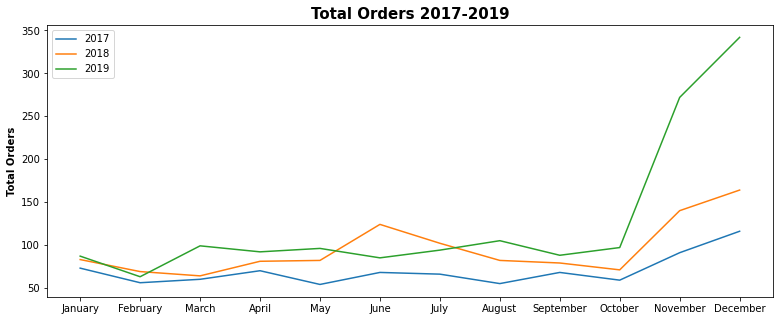

In [73]:
#Visualisasi Total Orders 
plt.figure(figsize=(13,5))
plt.plot(Month["Month"], Month["2017"], label="2017")
plt.plot(Month["Month"], Month["2018"], label="2018")
plt.plot(Month["Month"], Month["2019"], label="2019")
plt.title("Total Orders 2017-2019", weight="bold", fontsize=15)
plt.ylabel("Total Orders", fontsize=10, weight="bold")
plt.legend()

In [74]:
#Sum of Total Orders per year
Month_Sales = pd.DataFrame(df.Month.unique().tolist(), columns=["Month"])
Net_Sales = df["Net Sales"]
NS17 = pd.DataFrame(Net_Sales[:12].tolist(), columns=["2017"])
NS18 = pd.DataFrame(Net_Sales[12:24].tolist(), columns=["2018"])
NS19 = pd.DataFrame(Net_Sales[24:].tolist(), columns=["2019"])
Month_Sales["2017"], Month_Sales["2018"], Month_Sales["2019"] = NS17, NS18, NS19
print('Net Sales')
Month_Sales

Net Sales


,Month,2017,2018,2019
0,January,8283.65,8679.65,6299.43
1,February,6387.60,6249.70,6196.30
2,March,4589.10,7207.08,11654.65
3,April,8532.60,9134.07,6681.60
4,May,6237.45,5824.63,9448.00
5,June,9369.55,11418.87,6970.33
6,July,5959.30,8347.10,8383.38
7,August,7740.10,7360.78,8553.46
8,September,6732.30,10306.70,7869.21
9,October,5327.00,6441.80,7280.28


In [75]:
#Growth Net Sales by Year
#2017-2018
GS18 = round((Month_Sales["2018"].sum()-Month_Sales["2017"].sum())/Month_Sales["2017"].sum()*100, 2)
print("Growth Net Sales 2018 :" + str(GS18) +"%")
#2018-2019
GS19 = round((Month_Sales["2019"].sum()-Month_Sales["2018"].sum())/Month_Sales["2018"].sum()*100, 2)
print("Growth Net Sales 2019 :" + str(GS19) +"%")

Growth Net Sales 2018 :14.5%
Growth Net Sales 2019 :23.87%


Text(0.7, 26000, 'Net Sales Growth Rate 2019 = 23.87 %')

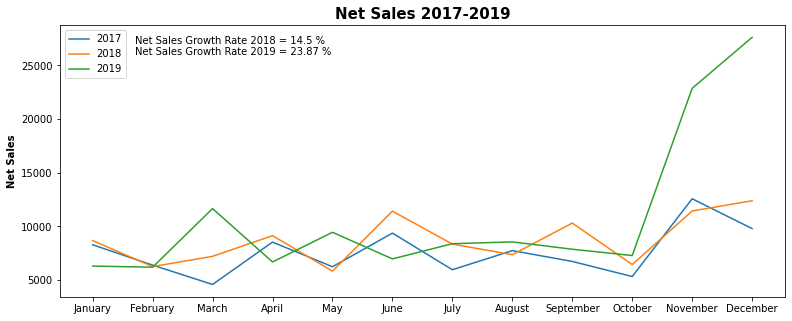

In [76]:
#Visualisasi Net Sales
plt.figure(figsize=(13,5))
plt.plot(Month_Sales["Month"], Month_Sales["2017"], label="2017")
plt.plot(Month_Sales["Month"], Month_Sales["2018"], label="2018")
plt.plot(Month_Sales["Month"], Month_Sales["2019"], label="2019")
plt.title("Net Sales 2017-2019", weight="bold", fontsize=15)
plt.ylabel("Net Sales", fontsize=10, weight="bold")
plt.legend()
plt.text(0.7,27000,"Net Sales Growth Rate 2018 = "+str(GS18)+" %")
plt.text(0.7,26000,"Net Sales Growth Rate 2019 = "+str(GS19)+" %")

In [77]:
#Dataset baru
Month_new = []
for i in Month_Sales["Month"]:
  Month_new.append(i+" 2017")
for i in Month_Sales["Month"]:
  Month_new.append(i+" 2018")
for i in Month_Sales["Month"]:
  Month_new.append(i+" 2019")
Month_new

['January 2017',
 'February 2017',
 'March 2017',
 'April 2017',
 'May 2017',
 'June 2017',
 'July 2017',
 'August 2017',
 'September 2017',
 'October 2017',
 'November 2017',
 'December 2017',
 'January 2018',
 'February 2018',
 'March 2018',
 'April 2018',
 'May 2018',
 'June 2018',
 'July 2018',
 'August 2018',
 'September 2018',
 'October 2018',
 'November 2018',
 'December 2018',
 'January 2019',
 'February 2019',
 'March 2019',
 'April 2019',
 'May 2019',
 'June 2019',
 'July 2019',
 'August 2019',
 'September 2019',
 'October 2019',
 'November 2019',
 'December 2019']

In [78]:
df_new = df
df_new = df_new.drop(["Month"], axis=1)
df_new["Year"] = Month_new
df_new = df_new.rename({'Year': 'Time'}, axis=1)
df_new

,Time,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January 2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95
1,February 2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05
2,March 2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53
3,April 2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90
4,May 2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91
5,June 2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87
6,July 2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66
7,August 2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56
8,September 2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62
9,October 2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42


In [79]:
#Growth Total Sales 
GTS = round((df_new["Total Sales"][35]-df_new["Total Sales"][0])/df_new["Total Sales"][0]*100, 2)
print("Growth Total Sales :" + str(GTS) +"%")

Growth Total Sales :255.38%


Text(-1, 31000, 'Total Sales Growth Rate = 255.38 %')

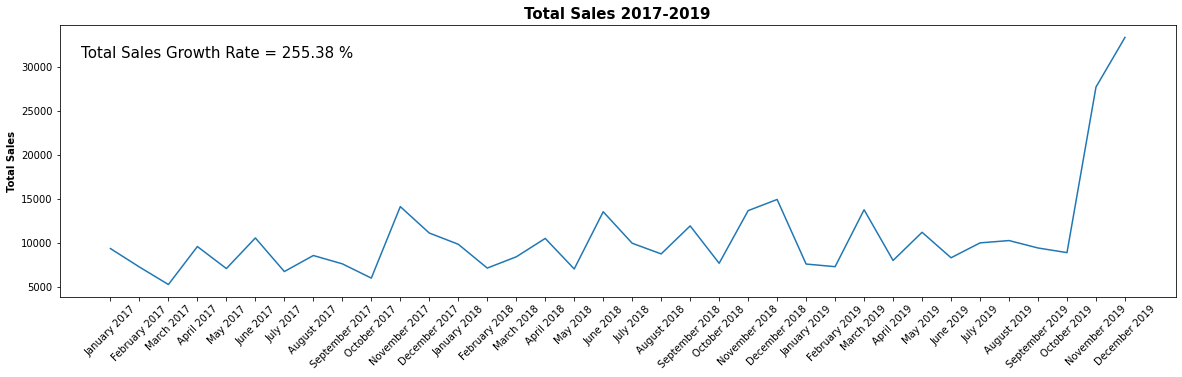

In [80]:
#Visualisasi Total Sales month by month
plt.figure(figsize=(20,5))
plt.plot(df_new["Time"], df_new["Total Sales"])
plt.title("Total Sales 2017-2019", weight="bold", fontsize=15)
plt.ylabel("Total Sales", fontsize=10, weight="bold")
plt.xticks(rotation=45)
plt.text(-1,31000,"Total Sales Growth Rate = "+str(GTS)+" %", fontsize=15)

Penjualan sangat meningkat drastis pada akhir tahun 2019, dan puncaknya terjadi pada bulan Desember 2019.